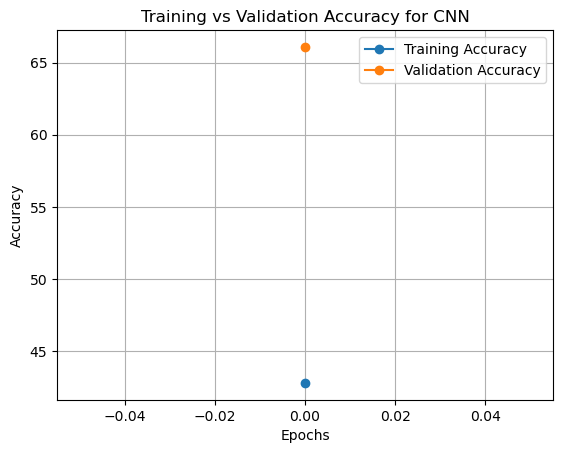

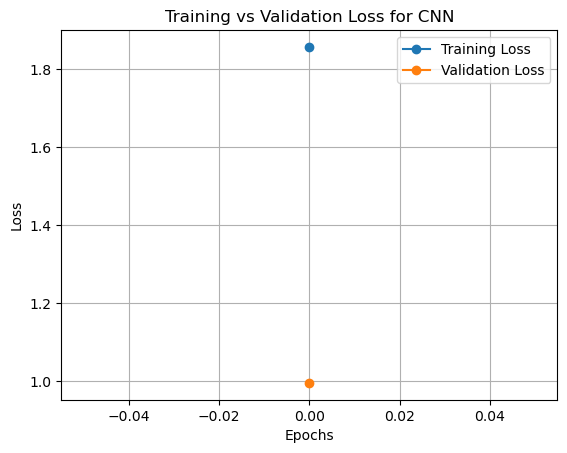

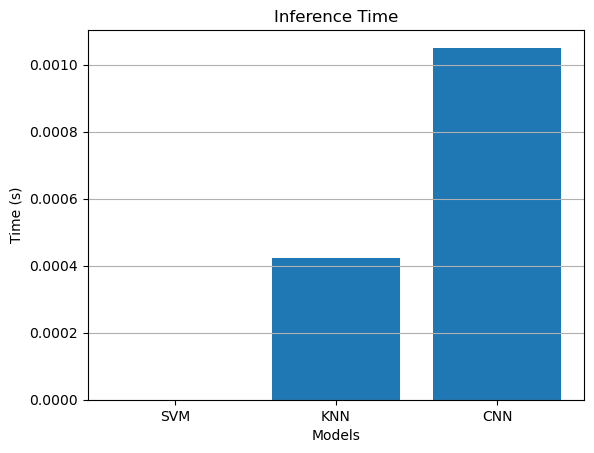

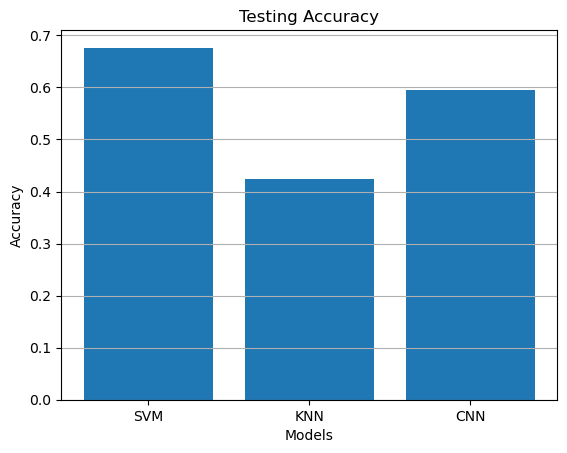

In [5]:
import os
import pickle
import matplotlib.pyplot as plt
import numpy as np

# Define the directory containing the models
base_dir = "runs"
models = ["base_svm", "base_knn", "base_cnn", "base_resnet", "base_vit"]

# Initialize storage for metrics
metrics = {}

# Iterate through models and load data
for model in models:
    log_path = os.path.join(base_dir, model, "log.pkl")
    if os.path.exists(log_path):
        with open(log_path, "rb") as f:
            metrics[model] = pickle.load(f)

# Ensure all models have been processed
if not metrics:
    print("No log.pkl files found in the specified directories.")
    exit()

# Extract metrics for bar graphs
inference_times = []
testing_accuracies = []
model_names = []

for model, data in metrics.items():
    model_names.append(model.replace("base_", "").upper())
    inference_times.append(data.get("inference_time", 0))
    testing_accuracies.append(data.get("test_accuracy", 0))

# Separate plots for training vs validation for CNN, ResNet50, and ViT
plot_models = ["base_cnn", "base_resnet", "base_vit"]
for model in plot_models:
    if model in metrics:
        data = metrics[model]
        
        # Training vs Validation Accuracy
        plt.figure()
        plt.plot(data.get("train_accuracy", []), label="Training Accuracy", marker="o")
        plt.plot(data.get("val_accuracy", []), label="Validation Accuracy", marker="o")
        plt.title(f"Training vs Validation Accuracy for {model.replace('base_', '').upper()}")
        plt.xlabel("Epochs")
        plt.ylabel("Accuracy")
        plt.legend()
        plt.grid()
        plt.show()

        # Training vs Validation Loss
        plt.figure()
        plt.plot(data.get("train_loss", []), label="Training Loss", marker="o")
        plt.plot(data.get("val_loss", []), label="Validation Loss", marker="o")
        plt.title(f"Training vs Validation Loss for {model.replace('base_', '').upper()}")
        plt.xlabel("Epochs")
        plt.ylabel("Loss")
        plt.legend()
        plt.grid()
        plt.show()

# Bar graph for inference time
plt.figure()
plt.bar(model_names, inference_times)
plt.title("Inference Time")
plt.xlabel("Models")
plt.ylabel("Time (s)")
plt.grid(axis="y")
plt.show()

# Bar graph for testing accuracy
plt.figure()
plt.bar(model_names, testing_accuracies)
plt.title("Testing Accuracy")
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.grid(axis="y")
plt.show()
